In [26]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("oilAndGas.csv")
df.fillna(0, inplace=True)

<AxesSubplot:>

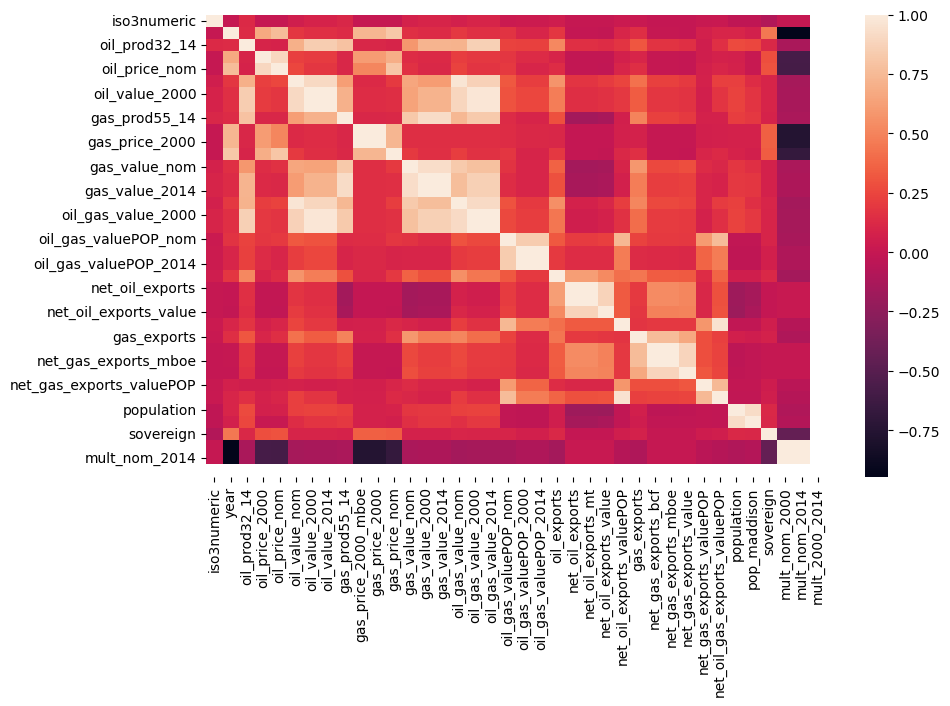

In [29]:
import matplotlib.pyplot as plt
cor = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor)

In [32]:
df.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,0.0,10.860860,0.87,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,0.0,8.815239,0.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,0.0,12.715790,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,0.0,12.039690,0.97,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,0.0,13.383210,1.09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,12.420786,17.075768,1.374774
